total training cat images : 800
total training dog images : 800
total training monkey images : 800
total training panda images : 800
total training cheetah images : 800
total validation cat images : 200
total validation dog images : 200
total validation monkey images : 200
total validation panda images : 200
total validation cheetah images : 200
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 16)        0         
______________________________________

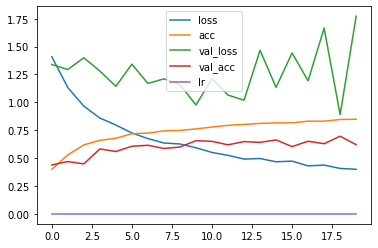

In [ ]:
import tensorflow as tensorFlow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
import PIL
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
 
 
base_directory = r'/content/drive/My Drive/Homework'
train_directory = os.path.join(base_directory, 'train')
test_directory = os.path.join(base_directory, 'test')
 
 
 
train_cats_dir = os.path.join(train_directory, 'cats')
train_dogs_dir = os.path.join(train_directory, 'dogs')
train_monkeys_dir = os.path.join(train_directory, 'monkey')
train_pandas_dir = os.path.join(train_directory, 'panda')
train_cheetah_dir = os.path.join(train_directory, 'cheetah')
 
 
test_cats_dir = os.path.join(test_directory, 'cats')
test_dogs_dir = os.path.join(test_directory, 'dogs')
test_monkeys_dir = os.path.join(test_directory, 'monkey')
test_pandas_dir = os.path.join(test_directory, 'panda')
test_cheetah_dir = os.path.join(test_directory, 'cheetah')
 
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
train_monkey_fnames = os.listdir( train_monkeys_dir )
train_panda_fnames = os.listdir( train_pandas_dir )
train_cheetah_fnames = os.listdir( train_cheetah_dir )


print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total training monkey images :', len(os.listdir( train_monkeys_dir ) ))
print('total training panda images :', len(os.listdir( train_pandas_dir ) ))
print('total training cheetah images :', len(os.listdir( train_cheetah_dir ) ))
print('total validation cat images :', len(os.listdir( test_cats_dir ) ))
print('total validation dog images :', len(os.listdir( test_dogs_dir ) ))
print('total validation monkey images :', len(os.listdir( test_monkeys_dir ) ))
print('total validation panda images :', len(os.listdir( test_pandas_dir ) ))
print('total validation cheetah images :', len(os.listdir( test_cheetah_dir ) ))
 
 
model = tensorFlow.keras.models.Sequential([
tensorFlow.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tensorFlow.keras.layers.MaxPooling2D(2,2),
    
tensorFlow.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
tensorFlow.keras.layers.MaxPooling2D(2,2),
    
tensorFlow.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
tensorFlow.keras.layers.MaxPooling2D(2,2),
    
tensorFlow.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
tensorFlow.keras.layers.MaxPooling2D(2,2),
    
tensorFlow.keras.layers.Flatten(),
    
tensorFlow.keras.layers.Dense(512, activation='relu'),
Dropout(0.5),
    
tensorFlow.keras.layers.Dense(5, activation='softmax')
])
model.summary()
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
from tensorflow.keras.optimizers import Adam,RMSprop
model.compile(optimizer=RMSprop(),
loss='categorical_crossentropy',
metrics = ['acc'])
 
DataGeneration = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
 

TrainGeneration = DataGeneration.flow_from_directory(
        train_directory,
        batch_size = 30,
        target_size=(150, 150),
        class_mode='categorical')
 

TestGeneration = ImageDataGenerator(rescale=1./255)
 
 
ValidationGeneration = TestGeneration.flow_from_directory(
        test_directory,
        target_size=(150, 150),
        batch_size = 30,
        class_mode='categorical')
 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
 
reduceLr = ReduceLROnPlateau(monitor='val_loss',mode='min', factor=0.2,
                              patience=5, min_lr=0.01)
 
model.fit(
        TrainGeneration,
        epochs=20,
        callbacks=[reduceLr],
        validation_data=ValidationGeneration,
        )
        
        
DataFramePlotting = pd.DataFrame(model.history.history)
DataFramePlotting.plot()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tensorFlow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
import PIL
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
ImagePath=r'/content/2.jpg'
img=image.load_img(ImagePath, target_size=(150, 150))
imgArray=image.img_to_array(img)
imgArray=np.expand_dims(imgArray, axis=0)
stackedImages = np.vstack([imgArray])
ImageClass = model.predict(stackedImages, batch_size=10)
ImageClass_Number = model.predict_classes(stackedImages, batch_size=10)
print(ImageClass)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[0. 0. 0. 0. 1.]]


In [ ]:
print(TrainGeneration.class_indices)

{'cats': 0, 'cheetah': 1, 'dogs': 2, 'monkey': 3, 'panda': 4}


In [ ]:
class_dictionary = TrainGeneration.class_indices  
inv_map = {v: k for k, v in class_dictionary.items()}  
print("The Image given is predicted as {}".format(inv_map[ImageClass_Number[0]]))

if ImageClass_Number[0] == 0:
  predict_dir = train_cats_dir
elif ImageClass_Number[0] == 1:
  predict_dir = train_cheetah_dir
elif ImageClass_Number[0] == 2:
  predict_dir = train_dogs_dir
elif ImageClass_Number[0] == 3:
  predict_dir = train_monkeys_dir
else:
  predict_dir = train_pandas_dir

import random
predictImageName = random.choice([x for x in os.listdir(predict_dir)
               if os.path.isfile(os.path.join(predict_dir, x))])
predictImage = mpimg.imread(os.path.join(predict_dir, predictImageName))

plt.subplot(1,2,1)
plt.imshow(mpimg.imread(ImagePath))

plt.subplot(1,2,2)
plt.imshow(predictImage)

plt.show()


In [ ]:
import cv2 
sim=[]

image = cv2.imread(ImagePath)
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
myhist = cv2.calcHist([gray_image], [0],None, [256], [0, 256]) 
for filename in os.listdir(predict_dir):
  image = cv2.imread(os.path.join(predict_dir, filename))
  gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  histogram = cv2.calcHist([gray_image], [0],None, [256], [0, 256])
  i=0
  c1=0
  while i<len(histogram) and i<len(myhist):
    c1+=(histogram[i]-myhist[i])**2
    i+= 1
  c1 = c1**(1 / 2)
  sim.append(c1)

minIndex=sim.index(min(sim))

i=0

for filename in os.listdir(predict_dir):
  if i==minIndex:
    plt.subplot(1,2,1)
    plt.imshow(mpimg.imread(ImagePath))
    plt.subplot(1,2,2)
    plt.imshow(mpimg.imread(os.path.join(predict_dir, filename)))
    plt.show()
    break;
  i=i+1
     
   


